<a href="https://colab.research.google.com/github/amr552/Teaching/blob/master/midtermCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8483667667928330030
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14410383360
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9817327693146958702
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [50]:
import numpy as np
from keras.preprocessing import image
#test image alacak
train_image=image.load_img('drive/MyDrive/dataset/training/with_mask/image_0.png', target_size=(64,64))
#array olarak civirmek icin
test_image=image.img_to_array(train_image)

test_image=image=np.expand_dims(train_imge,axis=0)

NameError: ignored

# **We start from here**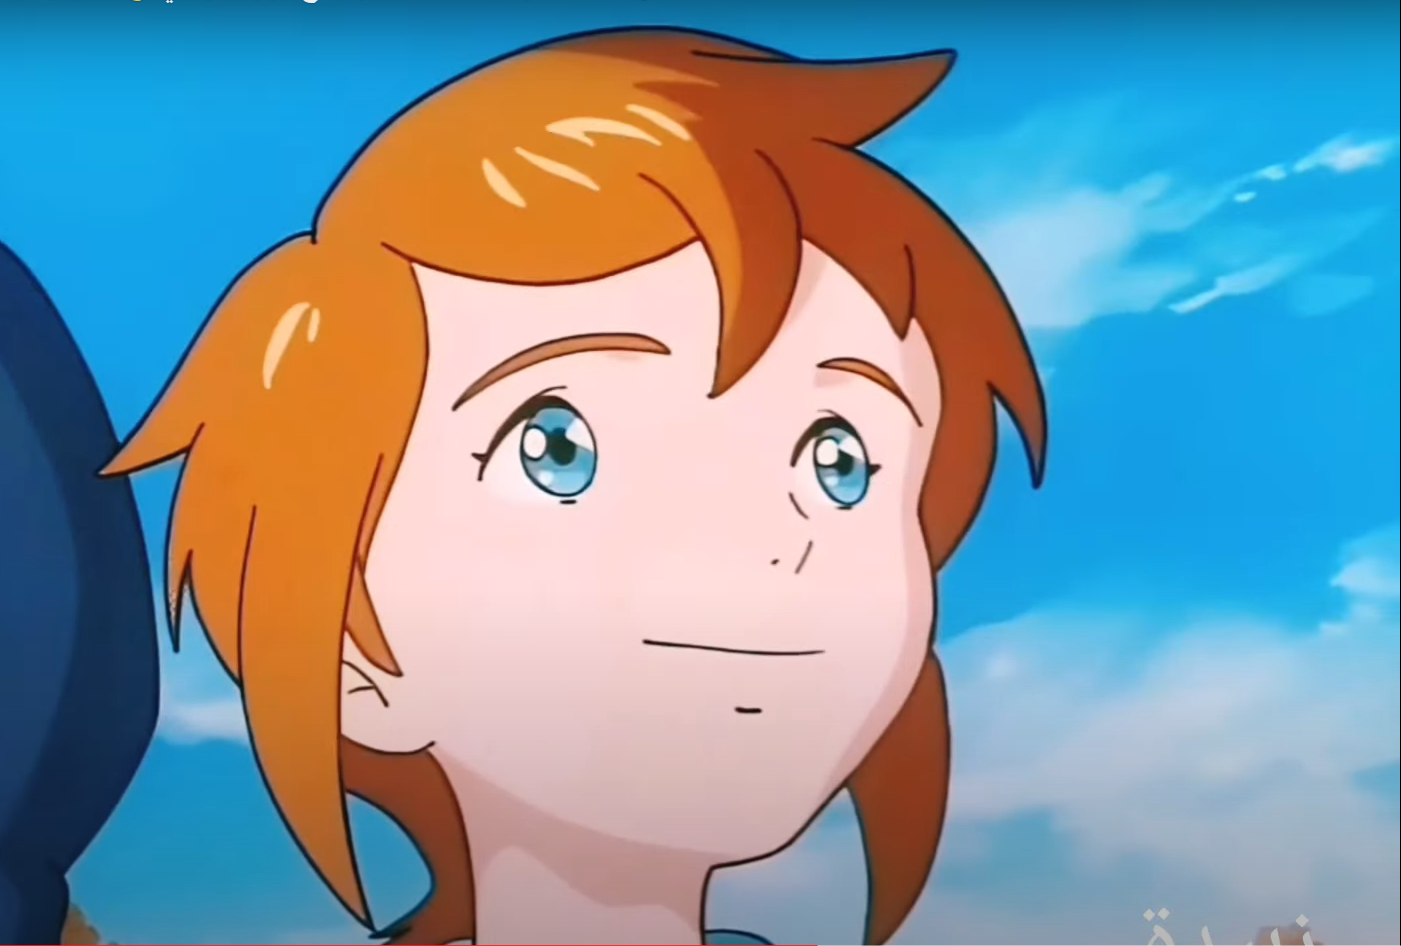

In [53]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator as rs
from tensorflow.keras.preprocessing  import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as tf
import cv2
import os
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

# initialize the initial learning rate
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

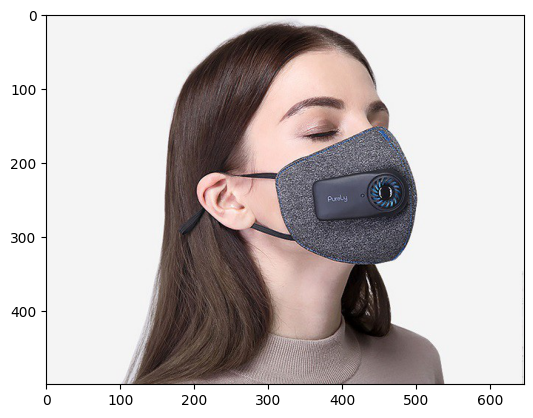

In [54]:
img=image.load_img('drive/MyDrive/dataset/training/with_mask/image_101.png')
plt.imshow(img)

In [4]:
cv2.imread('drive/MyDrive/dataset/training/with_mask/image_101.png').shape


(500, 646, 3)

In [55]:
traindim=rs(rescale=1/255)
validationdim=rs(rescale=1/255)

In [56]:
train_dataset=traindim.flow_from_directory('drive/MyDrive/dataset/training/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validationdim.flow_from_directory('drive/MyDrive/dataset/Validation',
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

Found 440 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [57]:
train_dataset.class_indices

{'with_mask': 0, 'without_mask': 1}

In [70]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(28,28,1)))

for i in range(16):
  model.add(BatchNormalization())
  model.add(Conv2D(filters=4,kernel_size=3,activation='relu',padding='same'))
  model.add(Dropout(rate=0.4))
  model.add(Conv2D(filters=4,kernel_size=3,activation='relu',padding='same'))

model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(units=16,activation='sigmoid'))
model.add(Dense(units=16,activation='sigmoid'))
model.add(Dense(units=10,activation='sigmoid'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_170 (Conv2D)         (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_80 (Ba  (None, 26, 26, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_171 (Conv2D)         (None, 26, 26, 4)         580       
                                                                 
 dropout_80 (Dropout)        (None, 26, 26, 4)         0         
                                                                 
 conv2d_172 (Conv2D)         (None, 26, 26, 4)         148       
                                                                 
 batch_normalization_81 (Ba  (None, 26, 26, 4)         16        
 tchNormalization)                                    

In [73]:
history=model.fit(train_dataset,steps_per_epoch=len(train_dataset)//32,validation_data=validation_dataset,epochs=5,validation_steps=len(validation_dataset)//32,batch_size=10)

Epoch 1/5


ValueError: ignored

In [26]:
training_set =train.flow_from_directory('drive/MyDrive/dataset/training/',target_size=(64,64),batch_size =32, class_mode='binary')


Found 440 images belonging to 2 classes.


In [27]:
test_set=validation.flow_from_directory('drive/MyDrive/dataset/Test', target_size=(64,64) , class_mode='binary',shuffle=False )


Found 992 images belonging to 2 classes.
